In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
lin_reg = LinearRegression()

In [3]:
from sklearn import datasets

In [12]:
housing = datasets.load_boston()

In [307]:
housing_data = housing.data
housing_val = housing.target
X_train,y_train,X_test,y_test = housing_data[:406,4:5],housing_val[:406],housing_data[406:,4:5],housing_val[406:]

In [132]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
X=housing_data[:,4:5]
y= housing.target

In [133]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [134]:
lin_reg.intercept_,lin_reg.coef_

(38.29668328729833, array([-26.6780821]))

In [135]:
lin_reg.predict([X_test[40]])

array([26.87846415])

In [136]:
y_test[40]

14.9

In [203]:
#now using gradient descend
from sklearn.linear_model import SGDRegressor

sgdReg = SGDRegressor(penalty=None, eta0=.1,random_state=42)

In [204]:
sgdReg.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [205]:
sgdReg.n_iter_

36

In [206]:
sgdReg.intercept_,sgdReg.coef_

(array([34.77148288]), array([-20.94437506]))

In [207]:
sgdReg.predict([X_test[40]])

array([25.80729036])

In [208]:
y_test[40]

14.9

In [209]:
from sklearn.preprocessing import PolynomialFeatures

In [210]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [211]:
X_poly = poly_features.fit_transform(X_train)

In [215]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
lin_reg.intercept_,lin_reg.coef_

(41.64056042786933, array([-38.37467141,   9.72236807]))

In [271]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=100)
    y_train = y_train.reshape(y_train.shape[0],1)
    y_val = y_val.reshape(y_val.shape[0],1)
    print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        #print(y_train_predict)
        #print(y_val_predict)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    
    plt.plot(np.sqrt(train_errors),"r-+", linewidth = 2, label="train")
    plt.plot(np.sqrt(val_errors),"b-", linewidth = 2, label="val")

(406, 1) (100, 1) (406, 1) (100, 1)


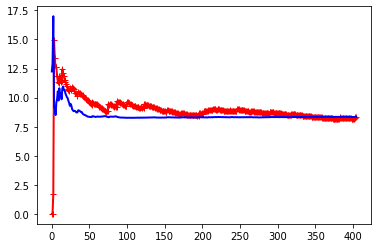

In [264]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [269]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
   ("poly_feature", PolynomialFeatures(degree=2,include_bias=False)),
    ("lin_reg", LinearRegression()),
))

(406, 1) (100, 1) (406, 1) (100, 1)


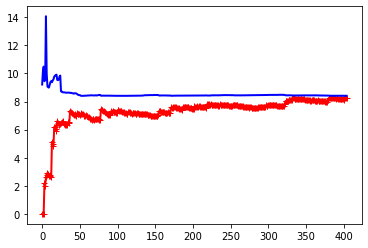

In [270]:
plot_learning_curves(polynomial_regression,X,y)

In [272]:
#Ridge with closed
from sklearn.linear_model import Ridge

In [282]:
ridge_reg = Ridge(alpha=1,solver="cholesky")

In [283]:
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [284]:
X[5],y[5]

(array([0.458]), 28.7)

In [285]:
ridge_reg.predict([X[5]])

array([25.39084158])

In [286]:
#Ridge with gradient descend
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [287]:
sgd_reg.predict([X[5]])

array([25.20587618])

In [290]:
# Lasso can be used for both SGD with penality l1 or lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [291]:
lasso_reg.predict([X[5]])

array([25.09077553])

In [294]:
#Elastic net
from sklearn.linear_model import ElasticNet
elstic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elstic_net.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [295]:
elstic_net.predict([X[5]])

array([23.14974123])

In [296]:
from sklearn.base import clone

In [297]:
sgd_reg = SGDRegressor(warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)

In [309]:
minimum_val_error = float("inf")
minimum_val_error
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train,y_train)
    y_val_predict = sgd_reg.predict(X_test)
    #print(y_test.shape,y_val_predict.shape,X_test.shape)
    val_error = mean_squared_error(y_val_predict,y_test)
    if val_error< minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [313]:
best_model,print(best_epoch),print(minimum_val_error)

569
43.30943832180437


(SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True), None, None)

In [314]:
from sklearn import datasets

In [315]:
iris = datasets.load_iris()

In [320]:
iris.feature_names
import numpy as np

In [322]:
X = iris.data[:,3:]
y = (iris.target == 2).astype(np.int)

In [323]:
from sklearn.linear_model import LogisticRegression

In [324]:
log_reg = LogisticRegression()

In [325]:
log_reg.fit(X,y)

/Users/ushadevi/Desktop/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [329]:
X_new = np.linspace(0,3,1000).reshape(-1,1)

In [334]:
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

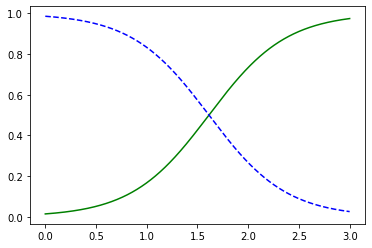

In [336]:
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virinica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virinica")

In [338]:
X= iris.data[:,(2,3)]
y = iris.target

In [339]:
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

In [340]:
softmax.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [344]:
X[80],y[80]

(array([3.8, 1.1]), 1)

In [345]:
softmax.predict([X[80]])

array([1])

In [346]:
softmax.predict_proba([X[80]])

array([[3.54571482e-03, 9.96187035e-01, 2.67250351e-04]])